# BitCoin stock prediction
This project is aimed at training a Machine Learning algorithm to make accurate predictions on the stock market value of BitCoin. The project consists of 4 sections.

Section 1 - Preprocessing the data provided and preparing it for the Machinle Learning model.

Section 2 - Model selection and implementation

Section 3 - Pickeling the trained model

Section 4 - Testing the models accuracy

## Section 1 - Preprocessing the data provided and preparing it for the Machinle Learning model.
This section covers the preprocessing of the data , checking relations between features and wrangling the data to be suitable for training on a Machine Learning algorithm.

In [117]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# read the csv files containing the data
train = pd.read_csv("C:\\Users\\heyle\\Documents\\final_V1_Training.csv")
test = pd.read_csv("C:\\Users\\heyle\\Documents\\final_V1_Testing.csv")

In [119]:
# display the training data
train

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [120]:
# display the testing data
test

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Aug 07, 2017",3212.78,3397.68,3180.89,3378.94,"1,482,280,000","52,987,300,000"
1,"Aug 06, 2017",3257.61,3293.29,3155.60,3213.94,"1,105,030,000","53,720,900,000"
2,"Aug 05, 2017",2897.63,3290.01,2874.83,3252.91,"1,945,700,000","47,778,200,000"
3,"Aug 04, 2017",2806.93,2899.33,2743.72,2895.89,"1,002,120,000","46,276,200,000"
4,"Aug 03, 2017",2709.56,2813.31,2685.14,2804.73,"804,797,000","44,666,400,000"
5,"Aug 02, 2017",2727.13,2762.53,2668.59,2710.67,"1,094,950,000","44,950,800,000"
6,"Aug 01, 2017",2871.30,2921.35,2685.61,2718.26,"1,324,670,000","47,321,800,000"


In [121]:
# check for null values in the training data
train.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [122]:
# display the rows containing no value in the volume column of the training data
dashes = train[train.Volume=="-"]
dashes

,Date,Open,High,Low,Close,Volume,Market Cap
1313,"Dec 26, 2013",683.94,777.75,683.94,761.98,-,"8,326,270,000"
1314,"Dec 25, 2013",666.31,682.70,649.48,682.21,-,"8,108,930,000"
1315,"Dec 24, 2013",672.36,684.39,645.71,665.58,-,"8,179,730,000"
1316,"Dec 23, 2013",613.06,680.91,611.04,673.41,-,"7,455,670,000"
1317,"Dec 22, 2013",601.78,666.74,585.64,617.18,-,"7,315,940,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [123]:
# drop the rows containing "-" in the volume column
train.Volume.replace("-", np.NaN, inplace=True)# change the "-" to NaN values
train.dropna(inplace=True)# drop the Nan values from the dataframe
train

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1308,"Dec 31, 2013",760.32,760.58,738.17,754.01,"20,897,300","9,268,240,000"
1309,"Dec 30, 2013",741.35,766.60,740.24,756.13,"20,707,700","9,037,000,000"
1310,"Dec 29, 2013",728.05,748.61,714.44,745.05,"19,011,300","8,872,600,000"
1311,"Dec 28, 2013",737.98,747.06,705.35,727.83,"32,505,800","8,990,850,000"


In [124]:
# remove commas between values for the training data
train.Volume = train.Volume.str.replace("\W", "")
train["Market Cap"] = train["Market Cap"].str.replace("\W", "")

In [125]:
# remove commas between values for the testing data
test.Volume = test.Volume.str.replace("\W", "")
test["Market Cap"] = test["Market Cap"].str.replace("\W", "")

In [126]:
# drop the date columns from the train and test datasets
train.drop("Date", axis=1, inplace=True)
test.drop("Date", axis=1, inplace=True)

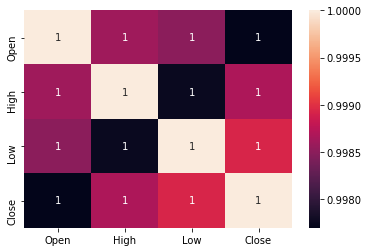

In [127]:
# draw a correlation matrix of the train dataset
corr = train.corr()
sns.heatmap(corr, annot=True)

The above correlation matrix shows that there is an extremely high correlation between the opening, high, low and closing prices of the BitCoin stock analytics

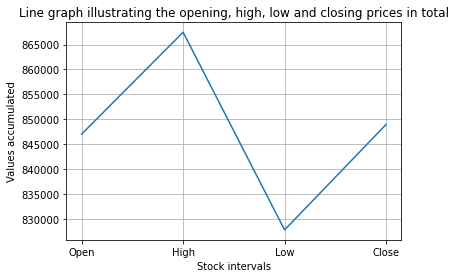

In [128]:
# draw a line graph representing the trend in total values of the open, high, low and closing prices
opens = train.Open.sum()# sum the total ammounts of each column
high = train.High.sum()
lows = train.Low.sum()
closing = train.Close.sum()
readings = [opens, high, lows, closing]
names = ["Open", "High", "Low", "Close"]
plt.plot(names, readings)
plt.title("Line graph illustrating the opening, high, low and closing prices in total")
plt.xlabel("Stock intervals")
plt.ylabel("Values accumulated")
plt.grid()
plt.show()

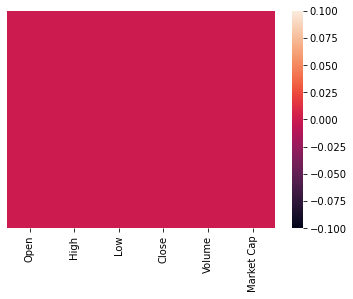

In [129]:
# check for remaining null values
sns.heatmap(train.isnull(), yticklabels=False)

The above heatmap shows that there are no remaining null values in he training dataset

## Section 2
### Model selection and implementation
In this section a suitable model will be selected for making predictions on the BitCoin stock prices. The preprocessed data above will be used to train this Machine Learning algorithm to make accuracte predictions. 

In [130]:
# import libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

Split the data into a target vector and features matrix

In [131]:
# create the target vector
target = train["Market Cap"]
target

0       45535800000
1       44890700000
2       46246700000
3       44144400000
4       41816500000
           ...     
1308     9268240000
1309     9037000000
1310     8872600000
1311     8990850000
1312     9295570000
Name: Market Cap, Length: 1313, dtype: object

In [132]:
# create the features matrix
train.drop("Market Cap", axis=1, inplace=True)
features = train
features

,Open,High,Low,Close,Volume
0,2763.24,2889.62,2720.61,2875.34,860575000
1,2724.39,2758.53,2644.85,2757.18,705943000
2,2807.02,2808.76,2692.80,2726.45,803746000
3,2679.73,2897.45,2679.73,2809.01,1380100000
4,2538.71,2693.32,2529.34,2671.78,789104000
...,...,...,...,...,...
1308,760.32,760.58,738.17,754.01,20897300
1309,741.35,766.60,740.24,756.13,20707700
1310,728.05,748.61,714.44,745.05,19011300
1311,737.98,747.06,705.35,727.83,32505800


In [133]:
# split the data into training and testing samples
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [134]:
# create a list of candidate algorithms to use for making the predictions
algScores = []
algList = [["LinearRegression", LinearRegression()],
           ["LogisticRegression", LogisticRegression()],
           ["GradientBoostingRegressor", GradientBoostingRegressor()],
           ["RandomForestRegressor", RandomForestRegressor()],
          ]
for reg in algList:
    modelName = reg[0]
    model = reg[1]
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    trainScore = model.score(x_train, y_train)
    testScore = model.score(x_test, y_test)
    algScores.append(["Model:",modelName, "Train score:", trainScore, "Test score:", testScore])
algFrame = pd.DataFrame(data=algScores)
algFrame

C:\Users\heyle\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0,1,2,3,4,5
0,Model:,LinearRegression,Train score:,0.994294,Test score:,0.994183
1,Model:,LogisticRegression,Train score:,0.000952,Test score:,0.000000
2,Model:,GradientBoostingRegressor,Train score:,0.999448,Test score:,0.997677
3,Model:,RandomForestRegressor,Train score:,0.999757,Test score:,0.997612


In [135]:
# implement the best performing model from the above results
model = LinearRegression()

In [136]:
# fit the data to the model
model.fit(x_train, y_train)

LinearRegression()

In [137]:
# make a prediction and display the model results
print(model.predict(x_test))
print(y_test)
print("Acccuracy score:",model.score(x_test, y_test))

[1.22632239e+10 1.92320255e+10 9.59278130e+09 6.31833603e+09
 7.99376140e+09 1.19630167e+10 9.86536341e+09 9.40999584e+09
 3.68720631e+09 1.10248299e+10 3.87604035e+10 1.32856733e+10
 2.14746680e+10 3.03260974e+09 5.15227300e+09 5.24531003e+09
 1.09735151e+10 1.28088646e+10 1.06379328e+10 6.54906142e+09
 6.15980026e+09 5.28326775e+09 6.26924606e+09 6.57225140e+09
 1.42434162e+10 3.89816364e+09 4.59212212e+10 1.66406596e+10
 3.02494627e+09 8.63759838e+09 1.61713732e+10 7.35363118e+09
 4.75324944e+09 4.22056046e+10 9.61876407e+09 5.53501307e+09
 3.23150903e+09 9.32000135e+09 3.08839227e+09 3.94481469e+10
 9.59936793e+09 5.50107557e+09 1.38136748e+10 1.04846061e+10
 6.45127603e+09 1.81275083e+10 8.47833621e+09 3.92043780e+10
 6.46454427e+09 9.23024831e+09 8.70490906e+09 4.07399252e+10
 7.42161255e+09 8.30711968e+09 1.73423674e+10 6.88648095e+09
 3.61067510e+09 4.81149660e+09 2.67965834e+10 3.08376445e+09
 6.18142342e+09 1.09516850e+10 3.46516005e+10 8.04220633e+09
 9.26230061e+09 5.177495

### Model Pickeling
Here the above trained model will be pickled and dumped into a file for use when making predictions.

In [138]:
# load the pickle library
import pickle

In [139]:
# dump the model into a file
with open("BitCoinPred", "wb") as mp:
    pickle.dump(model, mp)

In [140]:
# reload the dumped pickle file
with open("BitCoinPred", "rb") as bcp:
    modl = pickle.load(bcp)

### Testing the model
In this section the trained model will be tested by making predictions on external data that the model has not yet been exposed to.

In [141]:
# seperate the target values from the testing data
testingTarget = test["Market Cap"]
test.drop("Market Cap", axis=1, inplace=True)
test

,Open,High,Low,Close,Volume
0,3212.78,3397.68,3180.89,3378.94,1482280000
1,3257.61,3293.29,3155.60,3213.94,1105030000
2,2897.63,3290.01,2874.83,3252.91,1945700000
3,2806.93,2899.33,2743.72,2895.89,1002120000
4,2709.56,2813.31,2685.14,2804.73,804797000
5,2727.13,2762.53,2668.59,2710.67,1094950000
6,2871.30,2921.35,2685.61,2718.26,1324670000


In [142]:
# make a prediction using the external testing data provided
modl.predict(test)

array([5.25495156e+10, 5.30226515e+10, 4.70139320e+10, 4.52644840e+10,
       4.34174572e+10, 4.49912839e+10, 4.68237258e+10])

In [143]:
# display the testing target values for comparison
testingTarget

0    52987300000
1    53720900000
2    47778200000
3    46276200000
4    44666400000
5    44950800000
6    47321800000
Name: Market Cap, dtype: object